# Imports

In [1]:
import pandas as pd
from src.config import Config
from src.ensemble import Ensemble
from sklearn import metrics
import warnings

warnings.filterwarnings("ignore")

# Load Datasets

In [2]:
train_df = pd.read_csv(Config.filepath("train_prepared_both_le.csv"))
test_df = pd.read_csv(Config.filepath("test_prepared_both_le.csv"))

# Initialize The Ensemble

In [3]:
exclude = None
ensemble = Ensemble(train_df=train_df, test_df=test_df, exclude=exclude, l1_trials=10, l2_trials=10)

# Train Level 1 Models

In [4]:
ensemble.train_level_one_models()

AdaBoost:

Finding hyperparameters using Optuna...

# Train Level 2 Model

In [ ]:
model_name = "lr"
result = ensemble.train_level_two_model(model_name=model_name)

Training Logistic Regression as level 2 model...

Finding optimal hyperparameters using Optuna...

Best params: {'tol': 5.39948440978744e-05, 'C': 1.1504753106625047, 'solver': 
'liblinear'}

Training model with optimal parameters...

Fold 1 - Accuracy =  0.7976

Fold 2 - Accuracy =  0.8005

Fold 3 - Accuracy =  0.8148

Fold 4 - Accuracy =  0.8188

Fold 5 - Accuracy =  0.8142

Overall accuracy =  0.8092

Done!

In [ ]:
result.head()

,PassengerId,ada_preds,lgb_preds,lr_preds,rf_preds,xgb_preds,Transported
0,0013_01,0.499383,0.485711,0.596499,0.572142,0.399572,False
1,0018_01,0.483742,0.033362,0.001755,0.398342,0.044260,False
2,0019_01,0.511290,0.878389,0.987282,0.579504,0.929174,True
3,0021_01,0.513877,0.991767,0.992420,0.398915,0.938499,True
4,0023_01,0.500574,0.662118,0.456083,0.425617,0.570911,True


In [ ]:
result["Transported"].value_counts()

False    2645
True     1632
Name: Transported, dtype: int64

# Confusion Matrix

<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fc1019144f0>

<Figure size 432x288 with 2 Axes>

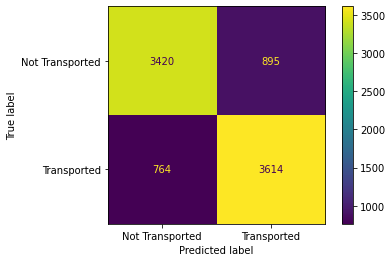

In [ ]:
train_results = ensemble.meta_train_df
y_true = train_results["Transported"].astype(int)
y_pred = train_results["preds"]
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=["Not Transported", "Transported"])